In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.inspection import permutation_importance

*Charging data set*


In [ ]:
df=pd.read_parquet('../data/interim/Breastnooutliers.parquet')

In [ ]:
df.dtypes

*Arranging the "diagnosis" data type*

In [ ]:
df['diagnosis']=df["diagnosis"].astype("category")

In [ ]:
df.dtypes

In [ ]:
df.info()

*Calculating nulls porcentaje*

In [ ]:
missing = df.isnull().sum()
missing[missing>0]*100/len(df)

*Because of the first experiment we are going to test with dropping the Nan rows*

In [ ]:
dfprueba1=df.dropna()
dfprueba1

In [ ]:
dfprueba1.diagnosis.value_counts()

In [ ]:
# se obtiene la matriz de correlacion de pearson. Observe que se toman
# únicamente variables numericas
from sklearn import preprocessing
matriz_correlacion = df.corr(method='pearson')
matriz_correlacion


In [ ]:
# se construye un mapa de calor a partir de la matriz de correlación
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(matriz_correlacion, annot=True);

*Splitting the data set into Target and explicatives( By now we are just going to split the data set into test and and training, and not with the validation, becouse of the amount of data that remains(166))*

In [ ]:
# se toman todas las columnas menos sobreviviente, que es la clase
X = dfprueba1.drop('diagnosis', axis=1)
# se selecciona la columna de la clase
y = dfprueba1['diagnosis']
# Split dataset into training set and test set
#random_state generador de numero aleatorios (semilla usada por el generador)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,shuffle=True) # 70% training and 30% test

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split function

tipificado = StandardScaler().fit(X_train)
standardized_X = tipificado.transform(X_train)
standardized_X_test = tipificado.transform(X_test)

In [ ]:
dfprueba1.columns

*Testing the more relevant variables*

In [ ]:
from sklearn.feature_selection import SelectKBest

best=SelectKBest(k=8)
X_new= best.fit_transform(X,y)
selected = best.get_support(indices=True)
caracteristicasUsadas =X.columns[selected]
print(caracteristicasUsadas)

*Testing a diferent kinds of models in order to find the best one*

In [ ]:
seed =2
models = []

#logistic Regression
models.append(('LR', LogisticRegression(solver='liblinear')))

# Decision Tree classifier
models.append(('CART', DecisionTreeClassifier()))

# Naïve Bayes
models.append(('NB', GaussianNB()))
# SVM
models.append(('SVM', SVC(C=1.0, kernel='rbf', max_iter=1000, tol=1e-3)))
# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, model in models:
	# Kfol cross validation for model selection
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	#X train , y train
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = f"({name}, {cv_results.mean()}, {cv_results.std()}"
	print(msg)

*Due to the result of the test, we find that the LogisticRegression and the Naive bayes are the best models until now, Now let see the data distribution with a box plot*

In [ ]:
result_df = pd.DataFrame(results, index=names).T
px.box(result_df,title = 'Algorithm Comparison')

In [ ]:
#priors calculation
y.value_counts()/len(y)

In [ ]:
a,b = y.value_counts()/len(y)

*Hyperparameter tunning*

In [ ]:
parameters = {'priors': [None, [a,b]]}

grid_search = GridSearchCV(GaussianNB(), parameters, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

In [ ]:
LR = LogisticRegression(max_iter=10000)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
*The recall or sensitivity obtained is a very good one achieving the 85% into the cross validation test*

In [ ]:
plot_confusion_matrix(LR, X_test, y_test,cmap=plt.cm.Blues);

*The model its able to predict the cells that are malignant and benign*

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp+fn)
sensitivity

*The confusion matrix show a good result by reaching 84%*

In [ ]:
*The recall or sensitivity obtained is a very good one achieving the 85% into the cross validation test*

C:\Users\CAMARA22\miniconda3\envs\project1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



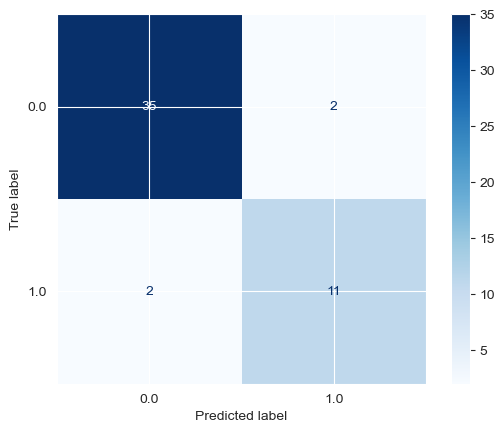

In [69]:
plot_confusion_matrix(LR, X_test, y_test,cmap=plt.cm.Blues);

*The model its able to predict the cells that are malignant and benign*

In [66]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp+fn)
sensitivity

0.8461538461538461

*The confusion matrix show a good result by reaching 84%*